# Import modules

In [1]:
from Project.cProject import Project

import logging
logging.basicConfig(level=logging.INFO)  # get some info during runtime

 # Set some parameters

In [2]:
path_folder = r'D:\Cariaco line scan Xray\uXRF slices\S0343a_480-485cm'
depth_span = (480, 485)

# Set the age model (combination of two shorter ones)

In [3]:
from data.cAgeModel import AgeModel
path_age_model_480_510 = r'C:/Users/Yannick Zander/Promotion/Cariaco 2024/Age Model/480-510/480_510_MSI_age_model_mm_yr.txt'
path_age_model_510_540 = r'C:/Users/Yannick Zander/Promotion/Cariaco 2024/Age Model/510-540/510_540_MSI_age_model_mm_yr.txt'

age_model_480_510 = AgeModel(path_age_model_480_510, depth_offset=4800, conversion_to_cm=1 / 10, sep='\t',
                             index_col=False)
age_model_510_540 = AgeModel(path_age_model_510_540, depth_offset=5100, conversion_to_cm=1 / 10, sep='\t',
                             index_col=False)

age_model = age_model_480_510 + age_model_510_540

In [4]:
age_model

           depth      age
0     480.089992  11194.2
1     480.099992  11194.4
2     480.109991  11194.6
3     480.119990  11194.8
4     480.129989  11195.0
...          ...      ...
5949  539.926400  11930.6
5950  539.936400  11930.7
5951  539.946400  11930.7
5952  539.956400  11930.8
5953  539.966400  11930.9

[5954 rows x 2 columns]

# Initialize the project

In [5]:
p = Project(is_MSI=False, path_folder=path_folder)

path_bcf_file, path_image_file and path_image_roi_file should match the desired files, if not, provide them as keyword arguments! The measurement name is infered from the folder name but is only relevant if multiple exports are found in the folder. If a project was created earlier for this measurement, additional files such as SampleImageHanderXRF_file will show up as well

In [6]:
p.__dict__

{'path_folder': 'D:\\Cariaco line scan Xray\\uXRF slices\\S0343a_480-485cm',
 'path_d_folder': 'D:\\Cariaco line scan Xray\\uXRF slices\\S0343a_480-485cm',
 'measurement_name': 'S0343a',
 'path_bcf_file': 'D:\\Cariaco line scan Xray\\uXRF slices\\S0343a_480-485cm\\Cariaco_484-485cm_2x100µm_BBDec3.bcf',
 'path_image_file': 'D:\\Cariaco line scan Xray\\uXRF slices\\S0343a_480-485cm\\Caricao_480-484cm_100µm_Mosaic.tif',
 'path_image_roi_file': 'D:\\Cariaco line scan Xray\\uXRF slices\\S0343a_480-485cm\\D0343aa_Video 1.txt',
 'ImageClassified_file': 'ImageClassified.pickle',
 'ImageROI_file': 'ImageROI.pickle',
 'ImageSample_file': 'ImageSample.pickle',
 'SampleImageHandlerXRF_file': 'SampleImageHandlerXRF.pickle'}

set depth and age interval

In [7]:
p.set_depth_span(depth_span)
p.age_model = age_model
p.set_age_span()

print(f'depth span: {p.depth_span} cm')
print(f' age span: {p.age_span} kyrs b2k')

depth span: (480, 485) cm
 age span: (11194.2, 11293.0084) kyrs b2k


# set the images

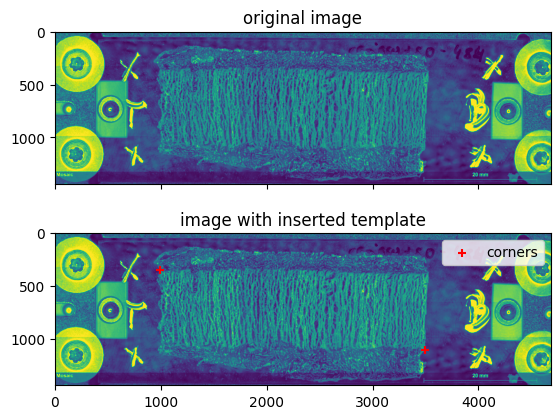

In [8]:
p.set_image_handler()
p.image_handler.plt_extent_data()

# set image sample object
if the obj color is not identified correctly, specify it (foreground pixels should be white) \n
if the roi is not detected correctly, call the function again with overwrite=True and interactive=True

In [9]:
p.set_image_sample(obj_color='light', overwrite=True)
# p.set_image_sample(obj_color='light', overwrite=True, interactive=True)

INFO:msi_workflow-imaging.util.Image_helpers:Determining threshold for background intensity with OTSU.
INFO:msi_workflow.imaging.main.cImage:searching optimal parameters for box
INFO:msi_workflow.imaging.main.cImage:found box with [5.37116564e-01 5.07000000e-01 1.56746907e+03 5.10478485e+02]
INFO:msi_workflow.imaging.main.cImage:solver converged: True
INFO:msi_workflow-imaging.util.Image_helpers:Determining threshold for background intensity with OTSU.
INFO:msi_workflow.util.cClass:saving image object with dict_keys(['obj_color', '_hw', 'path_folder', '_xywh_ROI']) to D:\Cariaco line scan Xray\uXRF slices\S0343a_480-485cm


INFO:msi_workflow.imaging.main.cImage:searching optimal parameters for box
INFO:msi_workflow.imaging.main.cImage:found box with [5.37116564e-01 5.07000000e-01 1.56746907e+03 5.10478485e+02]
INFO:msi_workflow.imaging.main.cImage:solver converged: True
INFO:msi_workflow-imaging.util.Image_helpers:Determining threshold for background intensity with OTSU.


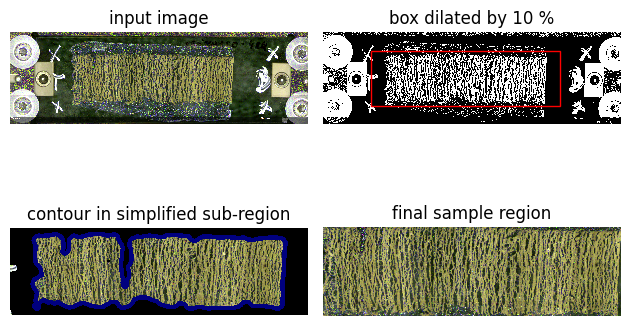

In [10]:
p.image_sample.plot_overview()

# set the ROI object
(uses the final sample region from the previous plot)

In [11]:
p.set_image_roi()
p.image_roi.set_punchholes(side='bottom')
# p.image_roi.set_punchholes(interactive=True)
p.image_roi.save()  # save changes

INFO:Project.cProject:loading ImageROI
INFO:msi_workflow.util.cClass:loading object with keys dict_keys(['obj_color', '_hw', '_image_original', 'path_folder', 'age_span', '_image_classification', '_params', '_punchholes', '_punchhole_size'])
INFO:msi_workflow-imaging.util.Image_helpers:Determining threshold for background intensity with OTSU.
INFO:msi_workflow.util.cClass:saving image object with dict_keys(['obj_color', '_hw', '_image_original', 'path_folder', 'age_span', '_image_classification', '_params', '_punchholes', '_punchhole_size']) to D:\Cariaco line scan Xray\uXRF slices\S0343a_480-485cm


INFO:msi_workflow.imaging.main.cImage:Estimating kernel size from age model (square with 2x expected thickness of one year).


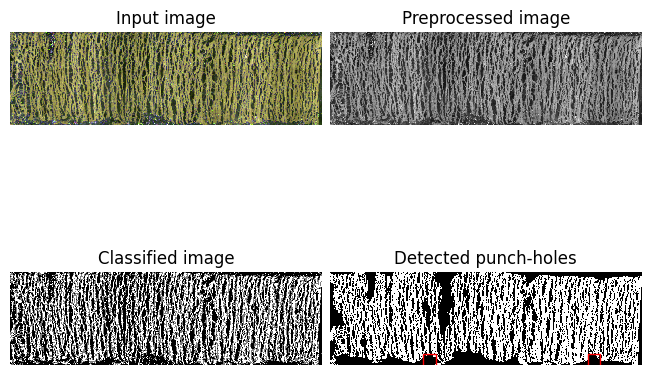

In [12]:
p.image_roi.plot_overview()

# set the classified image

In [13]:
p.set_image_classified()

INFO:Project.cProject:loading ImageClassified ...
INFO:msi_workflow.util.cClass:loading object with keys dict_keys(['obj_color', '_hw', '_image_original', 'path_folder', '_image_classification', 'age_span', 'params_laminae_simplified', 'image_seeds'])


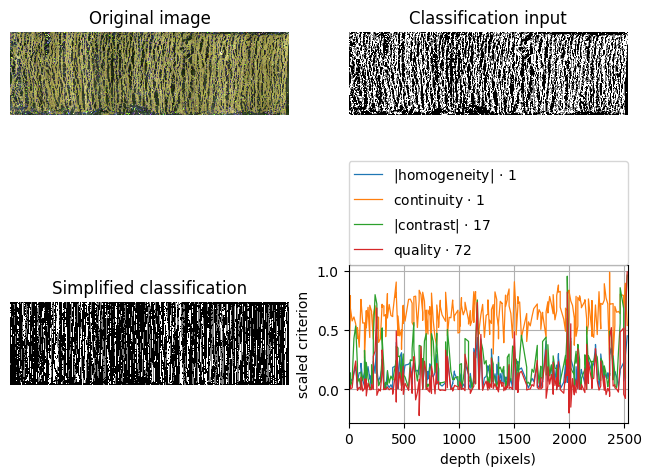

In [14]:
p.image_classified.plot_overview()

In [15]:
p.image_classified.params_laminae_simplified

,seed,a,b,c,d,height,success,color,width,prominence,homogeneity,continuity,brightness,contrast,quality
0,0,0.000000,0.000000,0.000000,0.000000,4.348980,True,light,4.348980,0.101228,-0.142857,0.219048,140.534161,0.002621,-0.000082
1,16,0.001949,-0.015158,0.022228,-0.003815,11.127153,True,light,5.825709,0.213896,-0.097397,0.626348,139.799328,-0.008254,0.000504
2,16,-0.011111,0.016667,-0.033333,-0.004414,4.763969,True,dark,6.638725,0.101306,0.070652,0.787166,143.718750,0.006665,0.000371
3,16,-0.011111,0.016667,-0.033333,-0.003514,5.966867,True,dark,5.435147,0.158717,0.091106,0.683469,143.831887,0.001122,0.000070
4,32,0.010017,0.016667,-0.033267,0.002926,8.801017,True,light,4.400509,0.101306,0.071730,0.576467,143.300105,0.004572,0.000189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2496,0.010454,-0.016667,-0.032260,0.003836,7.738696,True,dark,10.007768,0.250373,0.226974,0.789867,159.043174,0.040024,0.007176
255,2496,-0.007412,0.016588,0.008427,0.014292,33.803068,True,light,21.662102,0.250373,0.070574,0.688689,154.247727,-0.011246,-0.000547
256,2512,-0.011111,0.016667,-0.033333,-0.007127,12.433512,True,dark,10.719555,0.271277,0.216744,0.893529,156.469697,-0.005409,-0.001048
257,2512,0.000284,0.016667,0.027360,-0.000545,14.884727,True,light,7.442364,0.271277,0.287620,0.842862,162.095626,0.036756,0.008911


In [16]:
colors = p.image_classified.params_laminae_simplified.color
print(f'found {sum(colors == "light")} light and {sum(colors == "dark")} laminae')
print(f'whereas the age model predicts {round(p.age_span[1] - p.age_span[0])}')

found 130 light and 129 laminae
whereas the age model predicts 99


# set measurement
by default, this object also has information about the photo

In [17]:
p.set_object()

In [18]:
p.data_obj.feature_table

,Al,Br,Ca,Cl,Cr,Fe,K,Mg,Mn,Na,...,S,Si,Sr,Ti,V,L,x,y,Zn,R
0,0,0,110,18,4,10,4,0,10,0,...,2,18,0,0,0,12030,0,0,10,0
1,0,9,91,18,3,8,9,1,6,0,...,3,28,11,1,3,27911,1,0,3,0
2,1,5,78,25,1,7,4,0,6,2,...,8,20,7,1,0,36125,2,0,7,0
3,2,5,102,17,0,12,5,0,3,1,...,7,49,5,2,1,15090,3,0,10,0
4,0,10,73,10,1,7,9,2,7,1,...,6,56,6,0,2,23454,4,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269775,3,8,81,3,2,9,5,2,2,1,...,0,106,6,3,1,30522,935,286,7,0
269776,4,5,85,3,1,4,10,1,1,1,...,1,105,7,1,2,30706,936,286,5,0
269777,1,4,93,1,1,10,6,1,7,3,...,6,114,4,1,3,34210,937,286,8,0
269778,0,7,102,3,0,6,7,3,5,0,...,0,115,4,0,2,18335,938,286,3,0


INFO:msi_workflow.data.cDataClass:not clipping values


did not find the column valid in the feature table classifying the holes, so not excluding pixels


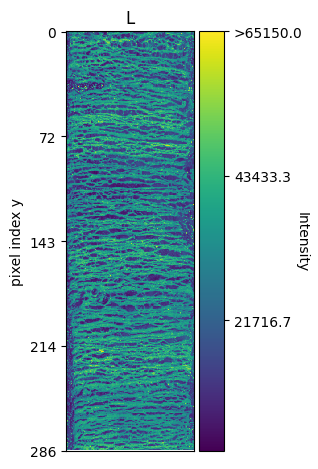

In [19]:
p.data_obj.plot_comp('L')

# add image related attributes to the data table

In [20]:
p.add_depth_column()
p.add_age_column()
p.add_pixels_ROI()
p.add_holes()
p.add_light_dark_classification()
p.add_laminae_classification()

INFO:msi_workflow-imaging.util.Image_helpers:Determining threshold for background intensity with OTSU.


INFO:msi_workflow.data.cDataClass:not clipping values


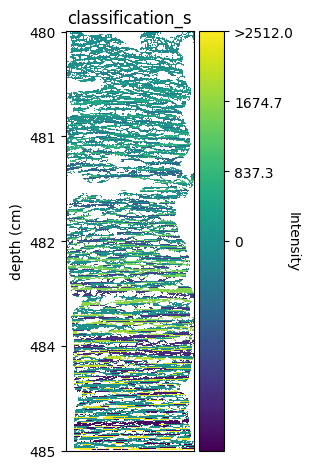

INFO:msi_workflow.data.cDataClass:not clipping values


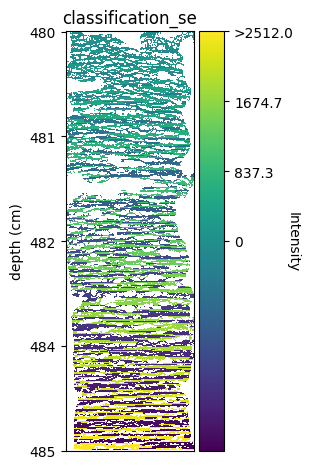

In [21]:
p.data_obj.plot_comp('classification_s')
p.data_obj.plot_comp('classification_se')

In [22]:
p.data_obj.feature_table.columns

Index(['Al', 'Br', 'Ca', 'Cl', 'Cr', 'Fe', 'K', 'Mg', 'Mn', 'Na', 'P', 'Rh',
       'S', 'Si', 'Sr', 'Ti', 'V', 'L', 'x', 'y', 'Zn', 'R', 'depth', 'age',
       'x_ROI', 'y_ROI', 'valid', 'classification', 'classification_s',
       'classification_se'],
      dtype='object')

INFO:msi_workflow.data.cDataClass:not clipping values


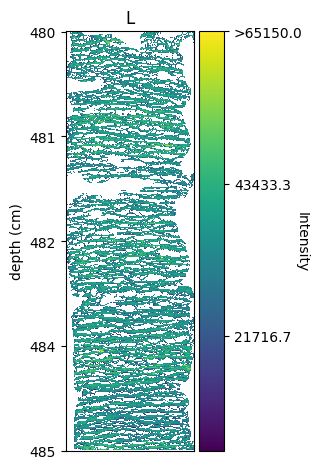

In [23]:
p.data_obj.plot_comp('L')

# set time series based on laminae classification

In [24]:
p.set_time_series()

INFO:msi_workflow.util.cClass:saving image object with dict_keys(['path_folder', 'feature_table', 'feature_table_standard_deviations', 'feature_table_successes']) to D:\Cariaco line scan Xray\uXRF slices\S0343a_480-485cm


# look at a few examples

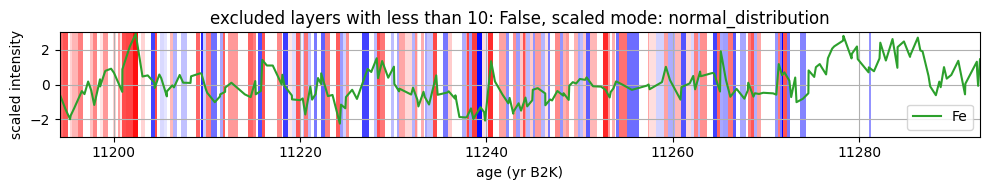

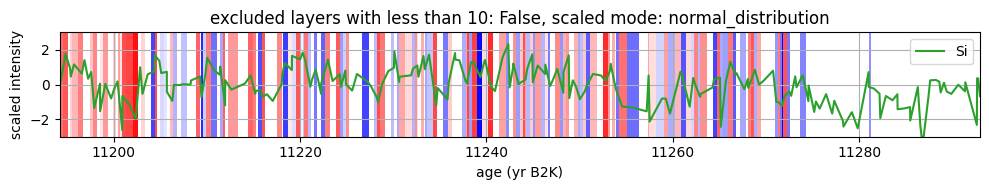

In [25]:
p.time_series.plot_comp('Fe', color_seasons=True)
p.time_series.plot_comp('Si', color_seasons=True)